# ENSO Diversity Changes: Observational comparison of advection terms over the last 50 years.

Question presented: 
ENSO characteristics depend on the background conditions of the tropical Pacific Ocean and the recent ~40-yr trend towards La Nina-like conditions appears to be changing the character of ENSO cycle variability, favoring a shift towards more CP vs EP type ENSO variations.

Following same method as (Jin, 2003) and (takahashi, 2016).

The mixed layer heat budget is calculated with the LHS as $ \frac{\partial T}{\partial t} $. In this project we consider composite CP and EP events of El Nino and La Nina, here it's advantages to consider the heat budget in terms of the temperature anomaly $T'$. Therefore, the temperature tendency terms becomes $\frac{\partial (T' + \overline{T})}{\partial t}$, where prime indicates the anomaly and bar the climatology, as the climatology is constant in time, the resulting budget will be for the anomalous temperature tendency $\frac{\partial T'}{\partial t}$. Right hand sides can be separated as such:

\begin{align}
    \frac{ \partial T' }{ \partial t } = ADV_X +ADV_Y +NDH +Q_{net}' +R
\end{align}

Where $ADV_X, \ ADV_Y, \ ADV_Z $, are the zonal, meridional and vertical velocities. $Q_{net}'$ are the anomalous surface flux terms and $R$ the residual, $NDH$ is the non-linear dynamical heat.

For the calculations presented, we will only consider the advection terms due to time constraints and as a simplification of the project. The advection terms will be listed below: 

\begin{align}
    ADV_X &= -u' \frac{\partial \overline{T}}{\partial x} - \overline{u} \frac{\partial T'}{\partial x}\\
    ADV_Y = &= -v' \frac{\partial \overline{T}}{\partial y} - \overline{v} \frac{\partial T'}{\partial y}\\
    ADV_z = &= -w' \frac{\partial \overline{T}}{\partial w} - \overline{w} \frac{\partial T'}{\partial w}\\
\end{align}

In this instance, by separating velocities in terms of anomaly and climatology we can better understand how the mean the difference in mean-state affects the anomalous velocity.

SST anomalies are largely driven by ENSO, therefore when considering ocean velocities anomalies ($u',v',w'$), take this as dominated by the affect of ENSO.

Therefore, zonal advection of mean SST by anomalous zonal currents $-u' \frac{\partial \overline{T}}{\partial t} $, for instance positive zonal anomalies in the equatorial Pacific indicate a stronger easterly current (if this statement is correct-not sure, maybe driven by an increase of trade winds?) then this would increase mean SST in west and decrease it in the east???? No clue tbh. I know the term is 'zonal advection of mean SST by anomalous zonal currents' but unsure how to interpret it. You can interpret the other $ \frac{\partial \overline{T}}{\partial y}$  terms in a similar manner.

The $\overline{w} \frac{\partial T'}{\partial w}$ (or $x/y$) term represents vertical advection of anomalous subsurface temperature by mean upwelling - i.e Ekman pumping??


### Data -> check if you all agree with this.

Using GODAS monthly means from 1980 to 2025, and considering two 25 year periods. We consider the climatology over each period and compute the and anomolus terms for each ENSO CP/EP events, from these terms we take composite for each type of event to see what advective terms contribute most.


Calculation of budget:
Will work on this untill someone tells me otherwise! :)

#### CP and EP El Nino
year in array is year 0

cp_years = [
    1986, 1991, 1994, 2002, 2004, 2009, 2014, 2018
]

ep_years = [
    1982, 1987, 1997, 2006, 2015, 2023
]
##### People 
Roger, Borianna, Yukito, Bela
- if you add code put your name on it so you get credit :)

In [504]:
import numpy as np
import xarray as xr
import matplotlib
import math
import os
import re
import seaborn as sns
import pandas as pd

# import xskillscore as xs
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable



# from xmip.postprocessing import _parse_metric

import cartopy.crs as ccrs

# import xskillscore as xs
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from matplotlib.lines import Line2D

import os
import re
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.patches as patches

from scipy.stats import scoreatpercentile

import xesmf as xe


/Users/isabelaconde/miniconda3/lib/python3.11/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


# Plotting SST mean state and wind stress terms 

Period 1: 1980-2000

Period 2: 2001-2020

Data: MERRA2

In [641]:
# Load MERRA2 data

# Path to the directory
directory_path = '/Users/isabelaconde/Desktop/data/MERRA2/M2TMNXOCN_5.12.4-20250130_234513'

# List all files in the directory
file_names = os.listdir(directory_path)
file_paths = [os.path.join(directory_path, file) for file in file_names]
file_paths

merra2 = xr.open_mfdataset(file_paths, combine='by_coords')

merra2['lon'] = ((merra2['lon']
merra2


<xarray.Dataset> Size: 16GB
Dimensions:         (time: 467, lat: 361, lon: 576)
Coordinates:
  * lon             (lon) float64 5kB -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat             (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time            (time) datetime64[ns] 4kB 1982-01-01T00:30:00 ... 2020-12...
Data variables: (12/42)
    EFLUXICE        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    EFLUXWTR        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    FRSEAICE        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    HFLUXICE        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    HFLUXWTR        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    LWGNTICE        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    ...              ...
    Var_TAUYICE     (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_TAUYWTR     (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_TSKINICE    (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_TSKINWTR    (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_U10M        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    Var_V10M        (time, lat, lon) float32 388MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Fri May 15 20...
    Filename:                          MERRA2_100.tavgM_2d_ocn_Nx.198201.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    DataResolution:                    0.5 x 0.625
    Source:                            CVS tag: GEOSadas-5_12_4
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/4IASLIDL8EEC
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

In [730]:
# sst = 
jra55_uatm = xr.open_dataset('/Users/isabelaconde/Desktop/data/wind_stress/OM2_1deg_era5_iaf_tau_x_1mon_global_1982_2020_tropics.nc').rename({'xu_ocean':'lon' , 'yu_ocean': 'lat'}).tau_x
jra55_vatm = xr.open_dataset('/Users/isabelaconde/Desktop/data/wind_stress/OM2_1deg_era5_iaf_tau_y_1mon_global_1982_2020_tropics.nc').rename({'xu_ocean':'lon' , 'yu_ocean': 'lat'}).tau_y
temp = xr.open_dataset('/Users/isabelaconde/Desktop/data/NOAA_OISST_sst_mon_mean.nc')



In [731]:
# pull out wind stress terms from the 2 periods as an array 
tau_x = [jra55_uatm.sel(time=slice('1982-01-01', '2000-12-31')), jra55_uatm.sel(time=slice('2001-01-01', '2020-12-31'))]
tau_y = [jra55_vatm.sel(time=slice('1982-01-01', '2000-12-31')), jra55_vatm.sel(time=slice('2001-01-01', '2020-12-31'))]

# pull out SST terms from the 2 periods as an array
SST= [temp.sel(time=slice('1982-01-01', '2000-12-31')).sst, temp.sel(time=slice('2001-01-01', '2020-12-31')).sst]


In [733]:
# find mean state and present in same way 

tau_x_mean = [tau_x[0].mean(dim='time'), tau_x[1].mean(dim='time')]
tau_y_mean = [tau_y[0].mean(dim='time'), tau_y[1].mean(dim='time')]

SST_mean = [SST[0].mean(dim='time'), SST[1].mean(dim='time')]

# # find climatologies for each period
# tau_x_clim = [tau_x[0].groupby('time.month').mean(dim='time'), tau_x[1].groupby('time.month').mean(dim='time')]
# tau_y_clim = [tau_y[0].groupby('time.month').mean(dim='time'), tau_y[1].groupby('time.month').mean(dim='time')]

# SST_clim = [SST[0].groupby('time.month').mean(dim='time'), SST[1].groupby('time.month').mean(dim='time')]

# # find anomalies for each period
# tau_x_anom = [tau_x[0].groupby('time.month') - tau_x_clim[0], tau_x[1].groupby('time.month') - tau_x_clim[1]]
# tau_y_anom = [tau_y[0].groupby('time.month') - tau_y_clim[0], tau_y[1].groupby('time.month') - tau_y_clim[1]]

# SST_anom = [SST[0].groupby('time.month') - SST_clim[0], SST[1].groupby('time.month') - SST_clim[1]]

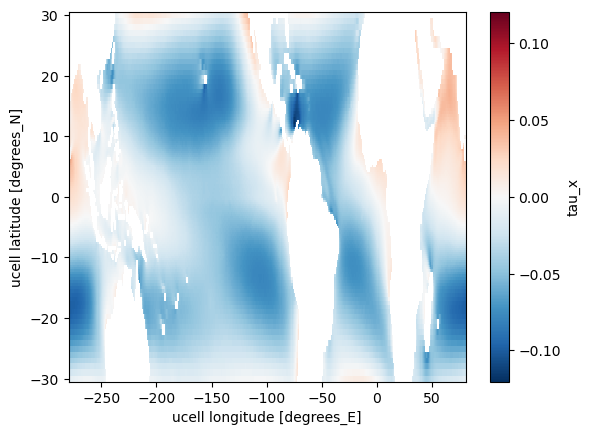

In [712]:
tau_x_mean[0].plot()

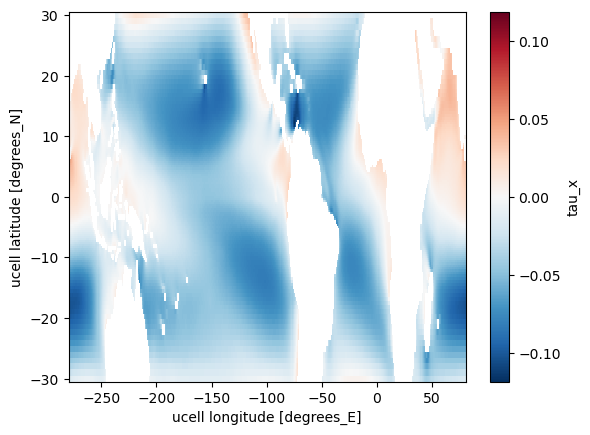

In [735]:
tau_x_mean[1].plot()

In [716]:
110-360
# 290-360

-250

# Calculate El Nino events, and CP and EP events

In [608]:
#Period 1
# find nino 3.4 index of DJF season

def find_nino34_vals(sst):
    # Subset Niño 3.4 region: 5°N–5°S, 170°W–120°W = 5 to -5 lat, 190 to 240 lon (in 0–360)
    nino34_region = sst.sel(lat=slice(5, -5),lon=slice(190, 240))
    nino34_avg = nino34_region.mean(dim=['lat', 'lon'])
    climatology = nino34_avg.sel(time=slice('1981-01', '2010-12')).groupby('time.month').mean()
    anomalies = nino34_avg.groupby('time.month') - climatology


    nino34_index = anomalies.rolling(time=3, center=True).mean()

    nino34_seasonal = nino34_index.resample(time='QS-Dec').mean()
    nino34_DJF = nino34_seasonal.sel(time=nino34_seasonal['time.month'] == 12)

    return nino34_DJF

SST_nino34 = [find_nino34_vals(SST[0]), find_nino34_vals(SST[1])]

# define a function to calculation nino 4 index
def find_nino4_vals(sst):
    # Subset Niño 4 region: 5°N–5°S, 160°E–150°W = 5 to -5 lat, 160E to 150W lon (in 0–360)
    nino4_region = sst.sel(lat=slice(5, -5),lon=slice(160, 210))
    nino4_avg = nino4_region.mean(dim=['lat', 'lon'])
    climatology = nino4_avg.sel(time=slice('1981-01', '2010-12')).groupby('time.month').mean()
    anomalies = nino4_avg.groupby('time.month') - climatology

    nino4_index = anomalies.rolling(time=3, center=True).mean()
    return nino4_index

SST_nino4 = [find_nino4_vals(SST[0]), find_nino4_vals(SST[1])]

# define a function to calculation nino 3 index
def find_nino3_vals(sst):
    # Subset Niño 3 region: 5°N–5°S, 150°W–90°W = 5 to -5 lat, 210 to 270 lon (in 0–360)
    nino3_region = sst.sel(lat=slice(5, -5),lon=slice(210, 270))
    nino3_avg = nino3_region.mean(dim=['lat', 'lon'])
    climatology = nino3_avg.sel(time=slice('1981-01', '2010-12')).groupby('time.month').mean()
    anomalies = nino3_avg.groupby('time.month') - climatology

    nino3_index = anomalies.rolling(time=3, center=True).mean()
    return nino3_index

SST_nino3 = [find_nino3_vals(SST[0]), find_nino3_vals(SST[1])]

# find el Nino events from nino34 index
def find_el_nino(nino_index):
    el_nino = nino_index.where(nino_index > 0.4)
    return el_nino

SST_nino34_el_nino = [find_el_nino(SST_nino34[0]), find_el_nino(SST_nino34[1])]
SST_nino34_el_nino[0].time.values

/Users/isabelaconde/miniconda3/lib/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'QS-Dec' is deprecated and will be removed in a future version, please use 'QS-DEC' instead.
  self.index_grouper = pd.Grouper(
/Users/isabelaconde/miniconda3/lib/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'QS-Dec' is deprecated and will be removed in a future version, please use 'QS-DEC' instead.
  self.index_grouper = pd.Grouper(


array(['1981-12-01T00:00:00.000000000', '1982-12-01T00:00:00.000000000',
       '1983-12-01T00:00:00.000000000', '1984-12-01T00:00:00.000000000',
       '1985-12-01T00:00:00.000000000', '1986-12-01T00:00:00.000000000',
       '1987-12-01T00:00:00.000000000', '1988-12-01T00:00:00.000000000',
       '1989-12-01T00:00:00.000000000', '1990-12-01T00:00:00.000000000',
       '1991-12-01T00:00:00.000000000', '1992-12-01T00:00:00.000000000',
       '1993-12-01T00:00:00.000000000', '1994-12-01T00:00:00.000000000',
       '1995-12-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-12-01T00:00:00.000000000', '1998-12-01T00:00:00.000000000',
       '1999-12-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

# Do some plotting

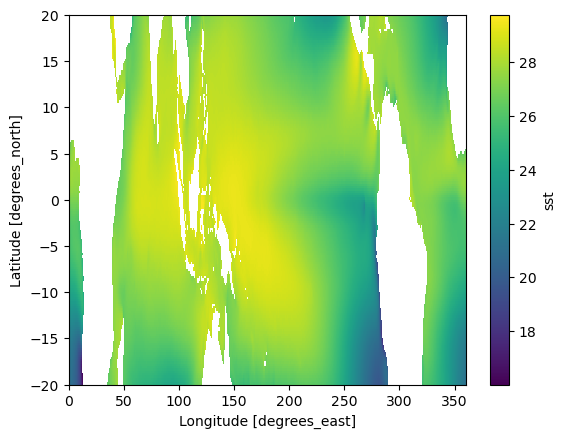

In [672]:
# colour_data1 = (SST_mean[0]-273.15).sel(lat=slice(-20, 20), lon=slice(110, 291))
# colour_data2 = (SST_mean[1]-273.15).sel(lat=slice(-20, 20), lon=slice(110, 291))

SST_mean[0].sel(lat=slice(-20, 20)).plot()

In [719]:
vec_data_x1.lon.values

<xarray.DataArray 'tau_x' (lat: 99, lon: 181)> Size: 72kB
array([[-0.02543294, -0.01944063, -0.01286732, ..., -0.00206906,
         0.00359652,         nan],
       [-0.02589438, -0.02013943, -0.01405658, ..., -0.00488225,
         0.00213986,         nan],
       [-0.02641253, -0.02096232, -0.01543001, ..., -0.01073351,
                nan,         nan],
       ...,
       [        nan, -0.02869015, -0.0362721 , ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.03842909, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.0414426 , ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB -250.0 -249.0 -248.0 -247.0 ... -72.0 -71.0 -70.0
  * lat      (lat) float64 792B -19.76 -18.97 -18.22 -17.5 ... 18.22 18.97 19.76

In [725]:
lon=vec_data_x1.lon.values
lon_360 = (lon + 360) % 360
lon_360

array([110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230.,
       231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241.,
       242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252.,
       253., 254., 255., 256., 257., 258., 259., 26

In [723]:
colour_data1

<xarray.DataArray 'sst' (lat: 160, lon: 720)> Size: 461kB
array([[25.30326 , 25.360426, 25.417025, ..., 20.240301, 19.934752,
        19.706959],
       [25.397713, 25.452904, 25.508863, ..., 20.288902, 19.991442,
        19.753658],
       [25.489262, 25.540834, 25.596127, ..., 20.31098 , 20.070911,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
        27.105747],
       [      nan,       nan,       nan, ..., 27.14489 , 27.133297,
        27.122135]], dtype=float32)
Coordinates:
  * lat      (lat) float32 640B -19.88 -19.62 -19.38 ... 19.38 19.62 19.88
  * lon      (lon) float32 3kB 110.1 110.4 110.6 110.9 ... 289.4 289.6 289.9

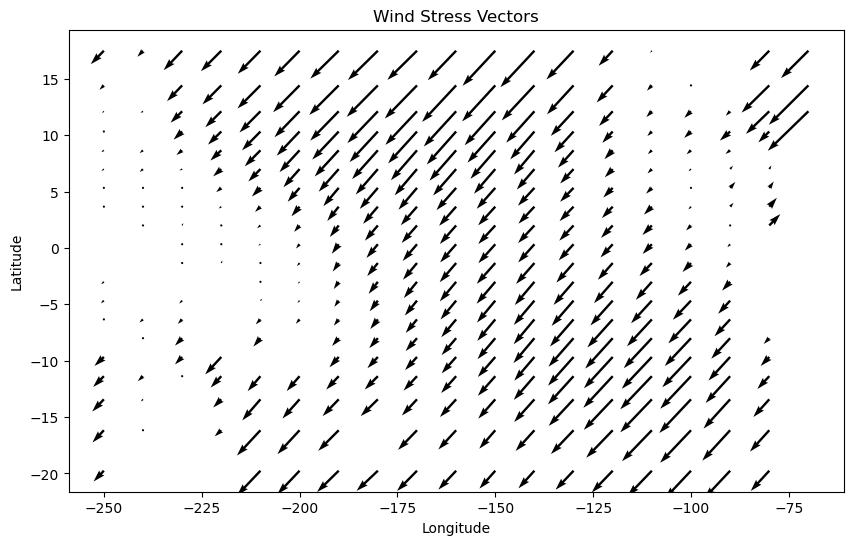

In [718]:
lon_step = 10  # Larger step for longitude
lat_step = 5   # Smaller step for latitude



lon = vec_data_x1['lon'][::lon_step]
lat = vec_data_x1['lat'][::lat_step]
taux = vec_data_x1[::lat_step, ::lon_step]
tauy = vec_data_x2[::lat_step, ::lon_step]

plt.figure(figsize=(10, 6))
plt.quiver(lon, lat, taux, tauy)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wind Stress Vectors')
plt.show()

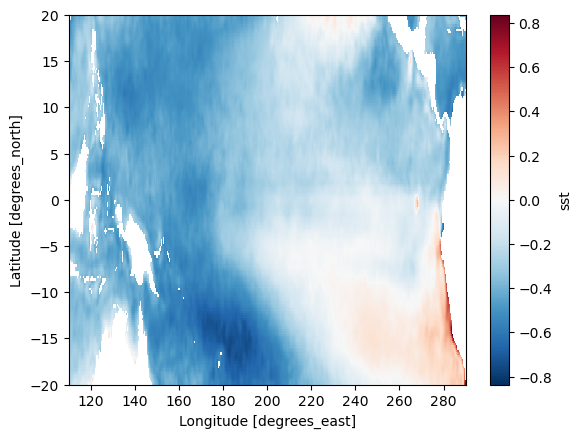

In [741]:
colour_data1 = (SST_mean[0]).sel(lat=slice(-20, 20), lon=slice(110, 290))
colour_data2 = (SST_mean[1]).sel(lat=slice(-20, 20), lon=slice(110, 290))

c = colour_data1-colour_data2
v = vec_data_x1 - vec_data_x2
c.plot()

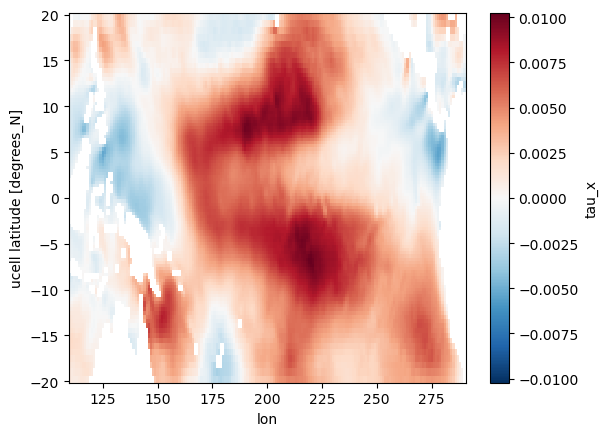

In [742]:
v.plot()


/var/folders/3m/hb6030nd3ml4fk_t3lq08f4w0000gn/T/ipykernel_18704/603246924.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


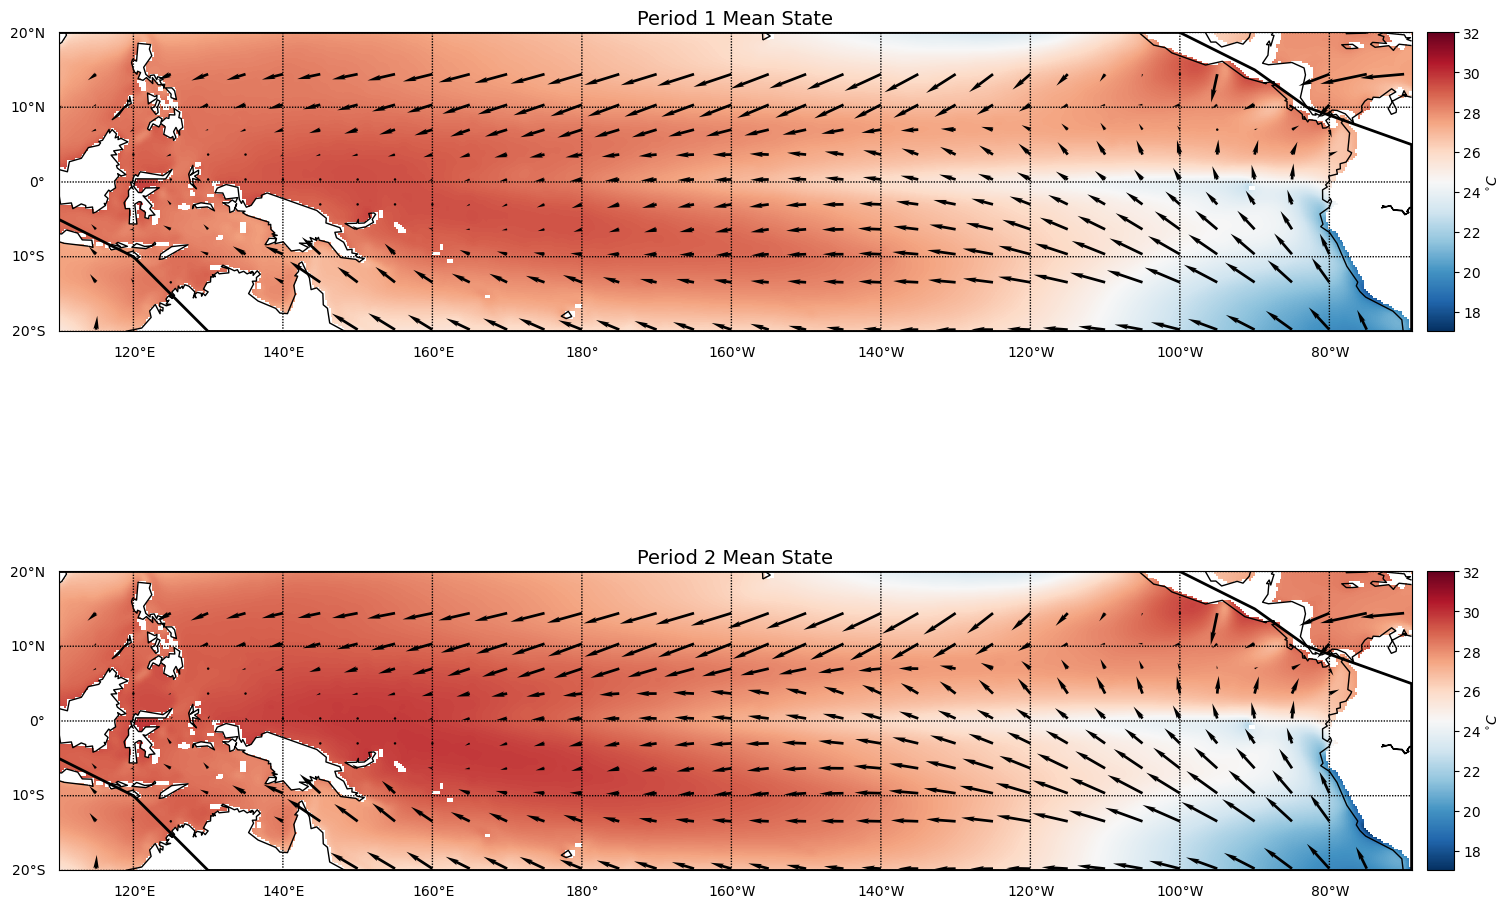

In [734]:
# atm: mean state of sst from 2 periods - convert to celcius
# colour_data1 = (SST_mean[0]).sel(lat=slice(-20, 20), lon=slice(110, 290))
# colour_data2 = (SST_mean[1]).sel(lat=slice(-20, 20), lon=slice(110, 290))

# vec_data_x1 = (tau_x_mean[0]).sel(lat=slice(-20, 20), lon=slice(-250, -70))
# vec_data_y1 = (tau_y_mean[0]).sel(lat=slice(-20, 20), lon=slice(-250, -70))

# vec_data_x2 = (tau_x_mean[1]).sel(lat=slice(-20, 20), lon=slice(-250, -70))
# vec_data_y2 = (tau_y_mean[1]).sel(lat=slice(-20, 20), lon=slice(-250, -70))

# # replace lon with lon_360
# vec_data_x1['lon'] = (vec_data_x1['lon']+360)%360
# vec_data_x2['lon']= (vec_data_x2['lon']+360)%360
# # #y1 and y2
# vec_data_y1['lon']=(vec_data_y1['lon']+360)%360
# vec_data_y2['lon']=(vec_data_y2['lon']+360)%360

mm_mean_gradient =colour_data1
noaa_trend_gr = colour_data2

lon_step = 5  # Larger step for longitude
lat_step = 10   # Smaller step for latitude


jra55_lon = vec_data_x1['lon'][::lon_step]
jra55_lat = vec_data_x1['lat'][::lat_step]
jra55_taux_trendstep = vec_data_x1[::lat_step, ::lon_step]
jra55_tauy_trendstep = vec_data_y1[::lat_step, ::lon_step]

era5_lon = vec_data_x2['lon'][::lon_step]
era5_lat = vec_data_x2['lat'][::lat_step]
era5_taux_trendstep = vec_data_x2[::lat_step, ::lon_step]
era5_tauy_trendstep = vec_data_y2[::lat_step, ::lon_step]

# repeat for merra2 data



# plot trend sst maps
# Create a figure with GridSpec layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1, figure=fig)#
gs.update(wspace=0.1, hspace=0.4) # set the spacing between axes. 

# Plot for MM_mean
ax3 = fig.add_subplot(gs[0, 0])

trend_map = Basemap(ax=ax3, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)



trend_map.imshow(colour_data1, cmap='RdBu_r',vmin = 17,vmax=32)
ax3.set_title('Period 1 Mean State', fontsize=14)


# plot quivers on top of the sst trend map
qx, qy = trend_map(jra55_lon, jra55_lat)

jra55_ws = np.hypot(jra55_taux_trendstep,jra55_tauy_trendstep)

quiv = trend_map.quiver(qx, qy, jra55_taux_trendstep, jra55_tauy_trendstep, scale=3, headwidth=2, width=0.002)  # Adjust 'scale' as needed


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = 17,vmax=32))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'$^{\circ}C $')


# Plot for z_score_coarse
ax4 = fig.add_subplot(gs[1, 0])
trend_map = Basemap(ax=ax4, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)


trend_map.imshow(colour_data2, cmap='RdBu_r',vmin = 17,vmax=32)
ax4.set_title('Period 2 Mean State', fontsize=14)

# plot quivers on top of the sst trend map
qx, qy = trend_map(era5_lon, era5_lat)

quiv = trend_map.quiver(qx, qy, era5_taux_trendstep, era5_tauy_trendstep, scale=3, headwidth=2, width=0.002)  # Adjust 'scale' as needed


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = 17,vmax=32))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'$^{\circ}C $')

plt.tight_layout()

# plt.savefig(os.path.expanduser("~/Desktop/trend_fig.png"), bbox_inches='tight')

/var/folders/3m/hb6030nd3ml4fk_t3lq08f4w0000gn/T/ipykernel_18704/1007245270.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


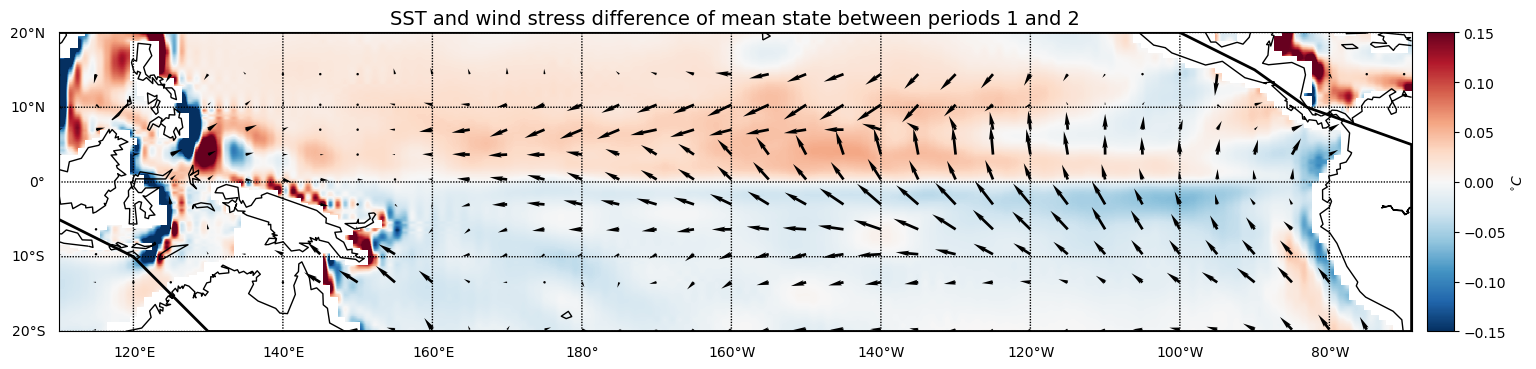

In [751]:
# atm: mean state of sst from 2 periods - convert to celcius
# colour_data1 = (SST_mean[0]).sel(lat=slice(-20, 20), lon=slice(110, 290))
# colour_data2 = (SST_mean[1]).sel(lat=slice(-20, 20), lon=slice(110, 290))

# vec_data_x1 = (tau_x_mean[0]).sel(lat=slice(-20, 20), lon=slice(-250, -70))
# vec_data_y1 = (tau_y_mean[0]).sel(lat=slice(-20, 20), lon=slice(-250, -70))

# vec_data_x2 = (tau_x_mean[1]).sel(lat=slice(-20, 20), lon=slice(-250, -70))
# vec_data_y2 = (tau_y_mean[1]).sel(lat=slice(-20, 20), lon=slice(-250, -70))

# # replace lon with lon_360
# vec_data_x1['lon'] = (vec_data_x1['lon']+360)%360
# vec_data_x2['lon']= (vec_data_x2['lon']+360)%360
# # #y1 and y2
# vec_data_y1['lon']=(vec_data_y1['lon']+360)%360
# vec_data_y2['lon']=(vec_data_y2['lon']+360)%360

vec_data_x =vec_data_x2 -  vec_data_x1 
vec_data_y =  vec_data_y2 - vec_data_y1


mm_mean_gradient =colour_data1 - colour_data2

lon_step = 5  # Larger step for longitude
lat_step = 10   # Smaller step for latitude


jra55_lon = vec_data_x['lon'][::lon_step]
jra55_lat = vec_data_x['lat'][::lat_step]
jra55_taux_trendstep = vec_data_x[::lat_step, ::lon_step]
jra55_tauy_trendstep = vec_data_y[::lat_step, ::lon_step]

# era5_lon = vec_data_x2['lon'][::lon_step]
# era5_lat = vec_data_x2['lat'][::lat_step]
# era5_taux_trendstep = vec_data_x2[::lat_step, ::lon_step]
# era5_tauy_trendstep = vec_data_y2[::lat_step, ::lon_step]

# repeat for merra2 data



# plot trend sst maps
# Create a figure with GridSpec layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(1, 1, figure=fig)#
gs.update(wspace=0.1, hspace=0.4) # set the spacing between axes. 

# Plot for MM_mean
ax3 = fig.add_subplot(gs[0, 0])

trend_map = Basemap(ax=ax3, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)



trend_map.imshow(colour_data1, cmap='RdBu_r',vmin = -0.15,vmax=0.15)
ax3.set_title('SST and wind stress difference of mean state between periods 1 and 2', fontsize=14)


# plot quivers on top of the sst trend map
qx, qy = trend_map(jra55_lon, jra55_lat)

jra55_ws = np.hypot(jra55_taux_trendstep,jra55_tauy_trendstep)

quiv = trend_map.quiver(qx, qy, jra55_taux_trendstep, jra55_tauy_trendstep, scale=0.5, headwidth=2, width=0.002)  # Adjust 'scale' as needed


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = -0.15,vmax=0.15))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'$^{\circ}C $')




plt.tight_layout()

# plt.savefig(os.path.expanduser("~/Desktop/trend_fig.png"), bbox_inches='tight')

In [686]:

ucur_mean =[ucur.sel(time=slice('1982-01-01', '2000-12-31')).sel(level = slice(0,65)).mean(dim='level').ucur.mean(dim='time'), ucur.sel(time=slice('2001-01-01', '2020-12-31')).sel(level = slice(0,65)).mean(dim='level').ucur.mean(dim='time')]
vcur_mean =[vcur.sel(time=slice('1982-01-01', '2000-12-31')).sel(level = slice(0,65)).mean(dim='level').vcur.mean(dim='time'), vcur.sel(time=slice('2001-01-01', '2020-12-31')).sel(level = slice(0,65)).mean(dim='level').vcur.mean(dim='time')]

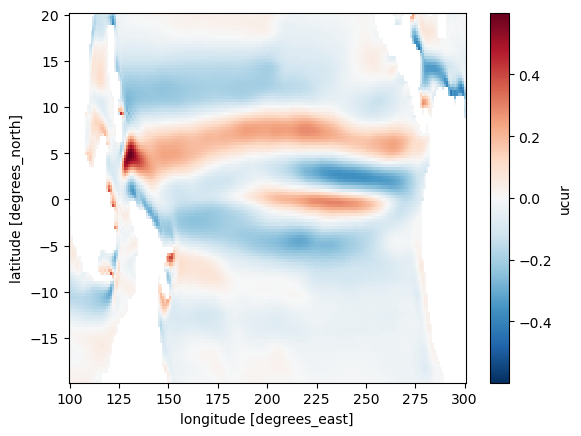

In [689]:
ucur_mean[0].plot()

/var/folders/3m/hb6030nd3ml4fk_t3lq08f4w0000gn/T/ipykernel_18704/738172063.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


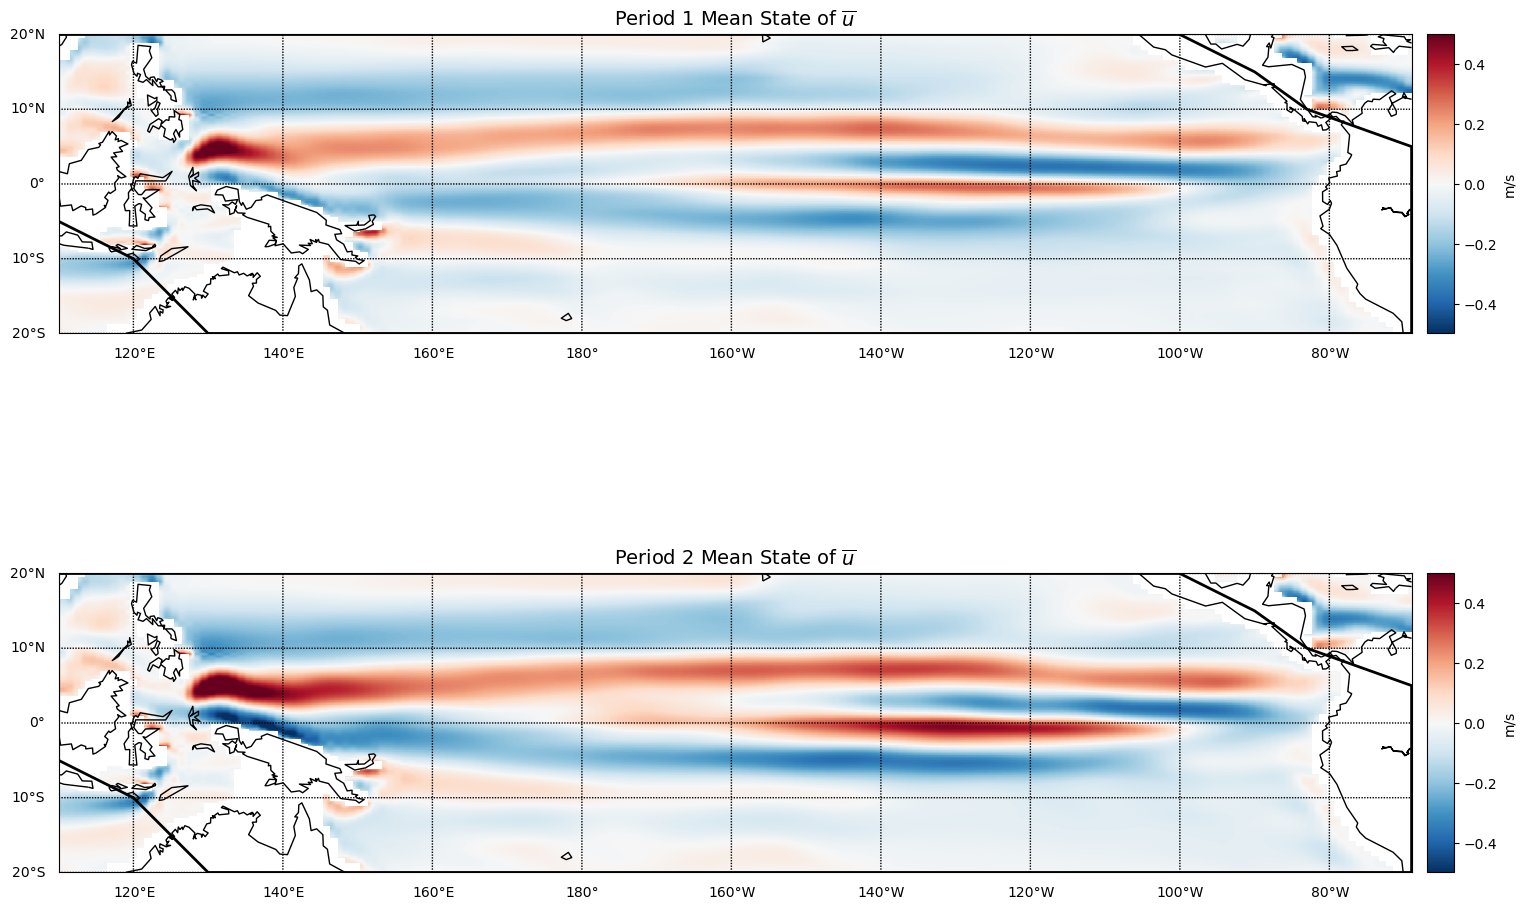

In [694]:

colour_data1 =ucur_mean[0].sel(lat=slice(-20, 20), lon=slice(110, 291))
colour_data2 = ucur_mean[1].sel(lat=slice(-20, 20), lon=slice(110, 291))


    
# plot trend sst maps
# Create a figure with GridSpec layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1, figure=fig)#
gs.update(wspace=0.1, hspace=0.4) # set the spacing between axes. 

# Plot for MM_mean
ax3 = fig.add_subplot(gs[0, 0])

trend_map = Basemap(ax=ax3, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)



trend_map.imshow(colour_data1, cmap='RdBu_r',vmin = -0.5,vmax=0.5)
ax3.set_title('Period 1 Mean State of $\overline{u}$', fontsize=14)


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = -0.5,vmax=0.5))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'm/s')


# Plot for z_score_coarse
ax4 = fig.add_subplot(gs[1, 0])
trend_map = Basemap(ax=ax4, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)


trend_map.imshow(colour_data2, cmap='RdBu_r',vmin =-0.5,vmax=0.5)
ax4.set_title(r'Period 2 Mean State of $\overline{u}$', fontsize=14)


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = -0.5,vmax=0.5))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'm/s')

plt.tight_layout()

# plt.savefig(os.path.expanduser("~/Desktop/trend_fig.png"), bbox_inches='tight')

/var/folders/3m/hb6030nd3ml4fk_t3lq08f4w0000gn/T/ipykernel_18704/1553391077.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


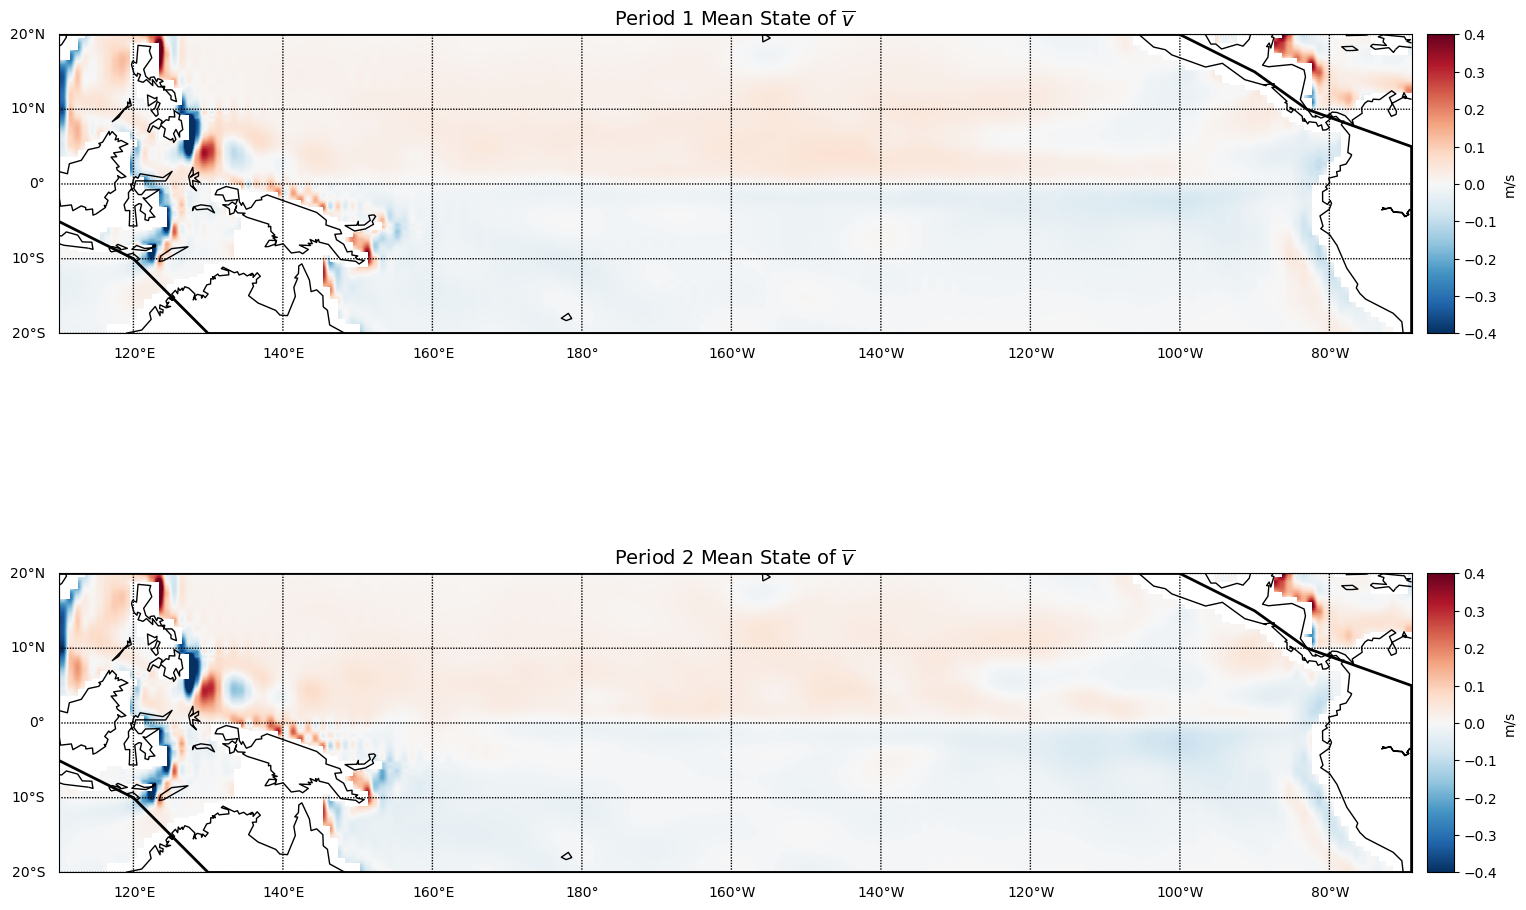

In [743]:

colour_data1 =vcur_mean[0].sel(lat=slice(-20, 20), lon=slice(110, 291))
colour_data2 = vcur_mean[1].sel(lat=slice(-20, 20), lon=slice(110, 291))


    
# plot trend sst maps
# Create a figure with GridSpec layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 1, figure=fig)#
gs.update(wspace=0.1, hspace=0.4) # set the spacing between axes. 

# Plot for MM_mean
ax3 = fig.add_subplot(gs[0, 0])

trend_map = Basemap(ax=ax3, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)



trend_map.imshow(colour_data1, cmap='RdBu_r',vmin = -0.4,vmax=0.4)
ax3.set_title('Period 1 Mean State of $\overline{v}$', fontsize=14)


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = -0.4,vmax=0.4))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'm/s')


# Plot for z_score_coarse
ax4 = fig.add_subplot(gs[1, 0])
trend_map = Basemap(ax=ax4, width=6000000, height=12000000, projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])


# Convert latitude and longitude to map projection coordinates
x, y = trend_map(lons, lats)

# Plot the custom outline
trend_map.plot(x, y, marker=None, color='k', linewidth=2)


trend_map.imshow(colour_data2, cmap='RdBu_r',vmin =-0.4,vmax=0.4)
ax4.set_title(r'Period 2 Mean State of $\overline{v}$', fontsize=14)


# Add colorbar using ScalarMappable for the last subplot
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="2%", pad=0.15)
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin = -0.4,vmax=0.4))
sm.set_array([])
plt.colorbar(sm, cax=cax, label=r'm/s')

plt.tight_layout()

# plt.savefig(os.path.expanduser("~/Desktop/trend_fig.png"), bbox_inches='tight')

# Attempt at a grid cell by grid cell budget - will return to if I have time

In [374]:
# Load GODAS data u,v and w velocity data, and temperature for the top 65m
folder_path = "/Users/isabelaconde/Desktop/godas_data/data/"  # Replace with your actual folder path

# u data 
file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("ucur")]
ucur = xr.open_mfdataset(file_list, combine="by_coords").sel(lat=slice(-20,20)).sel(lon=slice(100,300))

file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("vcur")]
vcur = xr.open_mfdataset(file_list, combine="by_coords").sel(lat=slice(-20,20)).sel(lon=slice(100,300))

# dzdt
file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("dzdt")]
dzdt= xr.open_mfdataset(file_list, combine="by_coords").sel(lat=slice(-20,20)).sel(lon=slice(100,300))

file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("thflx")]
thflx= xr.open_mfdataset(file_list, combine="by_coords").sel(lat=slice(-20,20)).sel(lon=slice(100,300))

#same for pottmp
file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("pottmp")]
pottmp= xr.open_mfdataset(file_list, combine="by_coords").sel(lat=slice(-20,20)).sel(lon=slice(100,300))

# #dbss
file_list = [folder_path+f for f in os.listdir(folder_path) if f.startswith("dbss")]
# dbss= xr.open_mfdataset(file_list, combine="by_coords")


In [449]:
# compute climatologies for period 1 1980-2010 and anomalies for period 2 2011-2020
# determine monthly climatology of variables

# define function to compute climatology and anomalies
def get_clim_anom(data):
    clim = data.groupby('time.month').mean('time', skipna=True)
    anom = data.groupby('time.month') - clim
    return clim, anom

variables = {
    "ucur": ucur.ucur,
    "vcur": vcur.vcur,
    "dzdt": dzdt.dzdt,
    "pottmp": pottmp.pottmp
    }

periods = {
    "1": slice("1980-01-01", "2000-12-31"),
    "2": slice("2001-01-01", "2020-12-31"),
}

dict_clim1, dict_clim2 = {}, {}
dict_anom1, dict_anom2 = {}, {}

clim_dicts = {'1': dict_clim1, '2': dict_clim2}
anom_dicts = {'1': dict_anom1, '2': dict_anom2}

for p, timeslice in periods.items():
    for name, da in variables.items():
        clim, anom = get_clim_anom(da.sel(time=timeslice))
        clim_dicts[p][f"{name}"] = ((clim.sel(level=slice(0, 65)).groupby('month').apply(lambda x: x)).sel(month=anom['time.month'])).assign_coords(time=anom['time'])
        anom_dicts[p][f"{name}"] = anom.sel(level=slice(0, 65))
    clim, anom = get_clim_anom(thflx.thflx.sel(time=timeslice))
    anom_dicts[p][f"thflx"] = anom
    clim_dicts[p][f"thflx"] = (clim.groupby('month').apply(lambda x: x)).sel(month=anom['time.month']).assign_coords(time=anom['time'])



In [376]:
def get_clim_anom(data):
    clim = data.groupby('time.month').mean('time', skipna=True)
    anom = data.groupby('time.month') - clim
    return clim, anom

variables = {
    "ucur": ucur.ucur,
    "vcur": vcur.vcur,
    "dzdt": dzdt.dzdt,
    "pottmp": pottmp.pottmp
}

periods = {
    "1": slice("1980-01-01", "2000-12-31"),
    "2": slice("2001-01-01", "2020-12-31"),
}

# Initialize datasets
clim_p1 = xr.Dataset()
anom_p1 = xr.Dataset()
clim_p2 = xr.Dataset()
anom_p2 = xr.Dataset()

clim_datasets = {'1': clim_p1, '2': clim_p2}
anom_datasets = {'1': anom_p1, '2': anom_p2}

for p, timeslice in periods.items():
    for name, da in variables.items():
        # Subset and compute climatology and anomalies
        clim, anom = get_clim_anom(da.sel(time=timeslice))

        # Depth-average both
        clim = clim.sel(level=slice(0, 65)).mean('level', skipna=True)
        anom = anom.sel(level=slice(0, 65)).mean('level', skipna=True)

        # Expand climatology to full time series shape
        clim_expanded = clim.groupby('month').apply(lambda x: x).sel(month=anom['time.month'])
        clim_expanded = clim_expanded.assign_coords(time=anom['time'])

        # Store in datasets
        clim_datasets[p][name] = clim_expanded
        anom_datasets[p][name] = anom

    # thflx (no depth dimension)
    clim, anom = get_clim_anom(thflx.thflx.sel(time=timeslice))
    clim_expanded = clim.groupby('month').apply(lambda x: x).sel(month=anom['time.month'])
    clim_expanded = clim_expanded.assign_coords(time=anom['time'])

    clim_datasets[p]['thflx'] = clim_expanded
    anom_datasets[p]['thflx'] = anom


In [403]:
Re = 6.371e6  # Earth radius (m)
deg2rad = np.pi / 180

# Get coordinates
lon = clim_dicts['1']['pottmp']['lon']
lat = clim_dicts['1']['pottmp']['lat']
level = clim_dicts['1']['pottmp']['level']

# Convert lon and lat to DataArrays explicitly if they aren't already
lon = xr.DataArray(lon, dims='lon', coords={'lon': lon})
lat = xr.DataArray(lat, dims='lat', coords={'lat': lat})
level = xr.DataArray(level, dims='level', coords={'level': level})

# Compute delta_lon in radians (assumes regular grid)
delta_lon = lon.diff('lon').mean().item() * deg2rad  # scalar spacing

# Now build the 2D dx field (lat × lon)
coslat = np.cos(np.deg2rad(lat))
dx_2d = Re * delta_lon * coslat
dx_2d = dx_2d.expand_dims({'lon': lon})

KeyError: 'level'

In [454]:
def advection_term(vel, T, dims, name):

    Re = 6.371e6  # Earth radius (m)
    deg2rad = np.pi / 180

    if dims == 'lon':
        lon = T['lon']
        lat = T['lat']
        delta_lon = lon.diff('lon').mean().item() * deg2rad  # scalar in radians
        coslat = np.cos(np.deg2rad(lat))
        dx = Re * delta_lon * coslat
        spacing = dx


    elif dims == 'lat':
        lat = T['lat']
        delta_lat = lat.diff('lat').mean().item() * deg2rad
        dy = Re * delta_lat
        spacing = dy


    elif dims == 'level':
        spacing = 60
        
    else:
        raise ValueError(f"Unsupported dimension: {dims}")
    
    #if dim is lat or lon
    if dims in ['lat', 'lon']:
        dT = T.differentiate(dims) /spacing # K/m^2
        dT = dT.interp({dims: T[dims]})

        dT_mean = dT.mean('level')

        eddy_adv = xr.DataArray(
            (-vel.isel({'lon': slice(1, None)}).mean('level').values * dT_mean.values),
            dims=dT_mean.dims,
            coords=dT_mean.coords,
            name= name
            )
    
    else:
        T = T.chunk({dims: 4})
        dT = T.differentiate(dims)

        dT_mean = dT.mean('level')
        eddy_adv = xr.DataArray(
            (-vel.mean('level').values * dT_mean.values),
            dims=dT_mean.dims,
            coords=dT_mean.coords,
            name= name
            )



    return eddy_adv

# calculation of ADV_x 
ADVx_anom_u  = -advection_term(anom_dicts['1']['ucur'], clim_dicts['1']['pottmp'], 'lon', 'adv_x_uprime' )
ADVx_clim_u = -advection_term(clim_dicts['1']['ucur'], anom_dicts['1']['pottmp'],  'lon','adv_x_bar')
ADV_X = ADVx_anom_u + ADVx_clim_u
ADV_X.name = 'ADV_X'
print('okay')

# ADV_y terms 
ADVy_anom_v  = -advection_term(anom_dicts['1']['vcur'], clim_dicts['1']['pottmp'],  'lat', 'adv_y_uprime')
ADVy_clim_v = -advection_term(clim_dicts['1']['vcur'], anom_dicts['1']['pottmp'], 'lat', 'adv_y_bar')
ADV_Y= ADVy_anom_v + ADVy_clim_v
ADV_Y.name = 'ADV_Y'
print('okay')

# # ADV_z terms
ADVz_anom_w  = -advection_term(anom_dicts['1']['dzdt'], clim_dicts['1']['pottmp'], 'level', 'adv_z_uprime')
ADVz_clim_w = -advection_term(clim_dicts['1']['dzdt'], anom_dicts['1']['pottmp'],  'level','adv_z_bar')
ADV_Z = ADVz_anom_w + ADVz_clim_w
ADV_Z.name = 'ADV_Z'
print('okay')

# combine into a single dataset
adv_terms = xr.merge([ADVx_anom_u, ADVx_clim_u, ADVy_anom_v, ADVy_clim_v, ADVz_anom_w, ADVz_clim_w, ADV_X, ADV_Y, ADV_Z])


okay


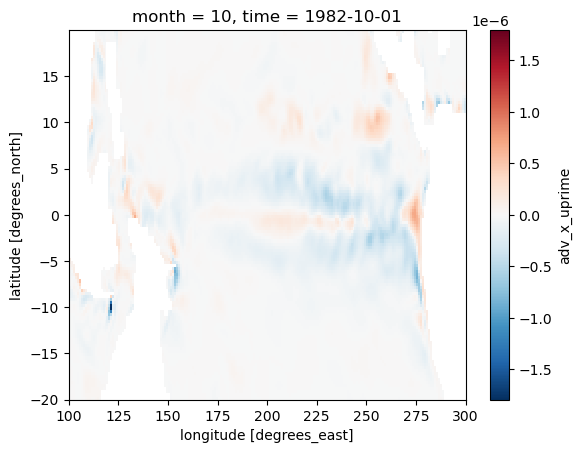

In [570]:
adv_terms.adv_x_uprime.sel(time='1982-10').plot()

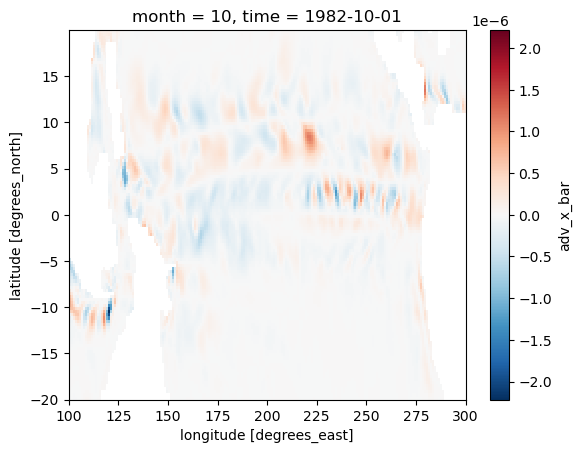

In [571]:
adv_terms.adv_x_bar.sel(time='1982-10').plot()

In [497]:
# year 0 listed - group months together
cp_years = [
    1986, 1991, 1994, 2002, 2004, 2009, 2014, 2018
]

ep_years = [
    1982, 1987, 1997, 2006, 2015, 2023
]

# Example event years
cp_years = [1986, 1991, 1994, 2002, 2004, 2009, 2014, 2018]
# Dictionary to store mean composite for each adv term
mean_cp_events = xr.Dataset()
month_event = np.arange(22)

# Loop over all advection variables in adv_terms
for varname in adv_terms.data_vars:
    composite_ds = xr.Dataset()

    for y in cp_years:
        if y <2000:
            subset = adv_terms['ADV_X'].sel(time=slice(f"{y}-01", f"{y+1}-10"))
            subset =subset.assign_coords(time=month_event)
            composite_ds[str(y)] = subset



    mean_cp_event = sum(composite_ds[var] for var in composite_ds.data_vars) / len(composite_ds.data_vars)
    mean_cp_event.name = f'mean_cp_{varname}'
    mean_cp_events[varname] = mean_cp_event


# same but for ep
mean_ep_events = xr.Dataset()

for varname in adv_terms.data_vars:
    composite_ds = xr.Dataset()

    for y in cp_years:
        if y <2000:
            subset = adv_terms['ADV_X'].sel(time=slice(f"{y}-01", f"{y+1}-10"))
            subset =subset.assign_coords(time=month_event)
            composite_ds[str(y)] = subset



    mean_ep_event = sum(composite_ds[var] for var in composite_ds.data_vars) / len(composite_ds.data_vars)
    mean_ep_event.name = f'mean_cp_{varname}'
    mean_ep_events[varname] = mean_ep_event

mean_ep_events

<xarray.Dataset> Size: 19MB
Dimensions:       (lat: 120, time: 22, lon: 200)
Coordinates:
  * lat           (lat) float32 480B -19.83 -19.5 -19.17 ... 19.17 19.5 19.83
    month         (time) int64 176B dask.array<chunksize=(22,), meta=np.ndarray>
  * lon           (lon) float32 800B 100.5 101.5 102.5 ... 297.5 298.5 299.5
  * time          (time) int64 176B 0 1 2 3 4 5 6 7 ... 14 15 16 17 18 19 20 21
Data variables:
    adv_x_uprime  (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    adv_x_bar     (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    adv_y_uprime  (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    adv_y_bar     (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    adv_z_uprime  (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    adv_z_bar     (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    ADV_X         (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    ADV_Y         (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10
    ADV_Z         (time, lat, lon) float32 2MB -1.37e-08 ... -2.979e-10

In [562]:
mean_ep_events.adv_x_uprime.isel(time = )

<xarray.DataArray 'adv_x_uprime' (time: 22, lat: 120, lon: 200)> Size: 2MB
array([[[-1.36968152e-08, -1.29440991e-08, -1.85039983e-08, ...,
                     nan,             nan,             nan],
        [-1.58189639e-08, -1.58117803e-08, -2.03077182e-08, ...,
                     nan,             nan,             nan],
        [-1.68714678e-08, -1.73680537e-08, -2.10050022e-08, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
          2.74228529e-09,  3.32342681e-10, -1.73940862e-11],
        [            nan,             nan,             nan, ...,
          2.80635892e-09,  2.77254358e-10,  2.60173771e-09],
        [            nan,             nan,             nan, ...,
          2.00874184e-09,  5.27022148e-10,  3.25256977e-09]],

       [[-7.31977545e-09, -1.07439710e-08, -1.52504516e-08, ...,
                     nan,             nan,             nan],
        [-9.12001585e-09, -1.27633930e-08, -1.61427867e-08, ...,
                     nan,             nan,             nan],
        [-1.02212754e-08, -1.39258036e-08, -1.64500467e-08, ...,
                     nan,             nan,             nan],
...
          8.61475613e-10,  1.32267264e-09,  1.42263235e-09],
        [            nan,             nan,             nan, ...,
          3.35570377e-10,  2.86414337e-09,  7.91575694e-10],
        [            nan,             nan,             nan, ...,
          1.09917020e-09,  2.47574405e-09, -1.82005522e-10]],

       [[ 1.65920044e-09,  7.64812302e-09,  1.84080857e-08, ...,
                     nan,             nan,             nan],
        [ 3.40167250e-09,  9.28510246e-09,  1.87209199e-08, ...,
                     nan,             nan,             nan],
        [ 5.26629185e-09,  1.03259161e-08,  1.79145427e-08, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
          5.46537648e-10,  7.73079212e-10,  4.01592454e-10],
        [            nan,             nan,             nan, ...,
         -5.87814519e-10,  9.58770507e-10,  3.22206622e-10],
        [            nan,             nan,             nan, ...,
         -2.85325541e-10,  6.15155205e-10, -2.97909780e-10]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 480B -19.83 -19.5 -19.17 -18.83 ... 19.17 19.5 19.83
    month    (time) int64 176B dask.array<chunksize=(22,), meta=np.ndarray>
  * lon      (lon) float32 800B 100.5 101.5 102.5 103.5 ... 297.5 298.5 299.5
  * time     (time) int64 176B 0 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20 21

In [500]:
event_mean_cp = mean_cp_events.sel(time = slice(11,13)).mean('time')
event_mean_ep = mean_ep_events.sel(time = slice(11,13)).mean('time')

In [507]:
LonsPts_pos = [130,120,110,110,110,260,270,270,277,291,291,130] #-np.ones(13)*180
LatsPts_pos =[-20,-10,-5,10,20,20,15,15,10,5,-20,-20]


x_pixel_pos = LonsPts_pos
y_pixel_pos = LatsPts_pos

outline_coords = []
for a, b in zip(x_pixel_pos, y_pixel_pos):
    outline_coords.append([a, b])
outline_coords

# Split the coordinates into separate lists for longitude and latitude
lons, lats = zip(*outline_coords)

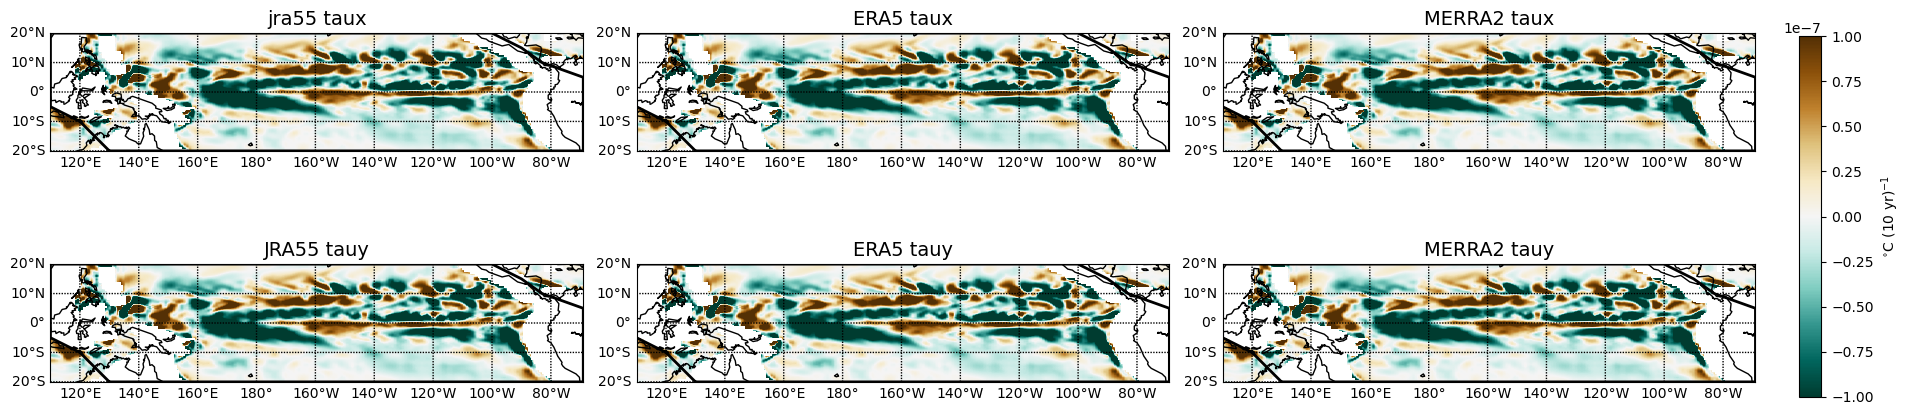

In [559]:

# Assuming data1 to data6 are your variables
data1 = event_mean_cp.ADV_X
data2 = event_mean_cp.ADV_Y
data3 = event_mean_cp.ADV_Z
data4 = event_mean_ep.ADV_X
data5 = event_mean_ep.ADV_Y
data6 = event_mean_ep.ADV_Z



all_min = -10**(-7)
all_max = 10**(-7)

# Create a figure with GridSpec layout for 3 columns and 2 rows
fig = plt.figure(figsize=(22, 18))
gs = GridSpec(2, 3, figure=fig)  # 2x3 grid
gs.update(wspace=0.1, hspace=-0.8)  # reduce the spacing between rows with hspace=0.05

# Plot for data1
ax1 = fig.add_subplot(gs[0, 0])
trend_map = Basemap(ax=ax1, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data1, cmap='BrBG_r',vmin=all_min, vmax=all_max)
ax1.set_title('jra55 taux', fontsize=14)

# Plot for data2
ax2 = fig.add_subplot(gs[0, 1])
trend_map = Basemap(ax=ax2, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data3, cmap='BrBG_r',vmin=all_min, vmax=all_max)
ax2.set_title('ERA5 taux', fontsize=14)

# Add colorbar for data2
# divider = make_axes_locatable(ax2)
# cax = divider.append_axes("right", size="2%", pad=0.15)
# sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin = all_min, vmax=all_max))
# sm.set_array([])
# plt.colorbar(sm, cax=cax, label=r'$^{\circ}$C (10 yr)$^{-1}$')

# Plot for data5
ax3 = fig.add_subplot(gs[0, 2])
trend_map = Basemap(ax=ax3, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data5, cmap='BrBG_r', vmin=all_min, vmax=all_max)
ax3.set_title('MERRA2 taux', fontsize=14)

# Plot for data3
ax4 = fig.add_subplot(gs[1, 0])
trend_map = Basemap(ax=ax4, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data2, cmap='BrBG_r', vmin=all_min, vmax=all_max)
ax4.set_title('JRA55 tauy', fontsize=14)

# Plot for data4
ax5 = fig.add_subplot(gs[1, 1])
trend_map = Basemap(ax=ax5, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data4, cmap='BrBG_r', vmin=all_min, vmax=all_max)
ax5.set_title('ERA5 tauy', fontsize=14)

# Plot for data6
ax6 = fig.add_subplot(gs[1, 2])
trend_map = Basemap(ax=ax6, width=6000000, height=12000000, projection='cyl', 
                   llcrnrlat=-20, urcrnrlat=20, llcrnrlon=110, urcrnrlon=291, area_thresh=10000)
trend_map.drawcoastlines()
trend_map.drawparallels(np.arange(-20, 20.1, 10.), labels=[1, 0, 0, 0])
trend_map.drawmeridians(np.arange(-180., 181., 20.), labels=[0, 0, 0, 1])
x, y = trend_map(lons, lats)
trend_map.plot(x, y, marker=None, color='k', linewidth=2)
trend_map.imshow(data6, cmap='BrBG_r', vmin=all_min, vmax=all_max)
ax6.set_title('MERRA2 tauy', fontsize=14)

# Add colorbar for data6
# divider = make_axes_locatable(ax6)
# cax = divider.append_axes("right", size="2%", pad=0.15)
# sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=all_min, vmax=all_max))
# sm.set_array([])
# plt.colorbar(sm, cax=cax, label=r'$^{\circ}$C (10 yr)$^{-1}$')

# plt.tight_layout()

# Add a common colorbar spanning both rows
cbar_ax = fig.add_axes([0.92, 0.39, 0.01, 0.2])  # Adjust the position and size to make it smaller
sm = plt.cm.ScalarMappable(cmap='BrBG_r', norm=plt.Normalize(vmin=all_min, vmax=all_max))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label=r'$^{\circ}$C (10 yr)$^{-1}$')


plt.show()

